In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

## Reading data

In [3]:
data=pd.read_csv("Travel_insurance_Data.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
data.shape

(1987, 10)

In [5]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
label_encoder= LabelEncoder()  # used to convert categorical text data (like "Yes" and "No") into numerical data (like 1 and 0).
data["FrequentFlyer"]= label_encoder.fit_transform(data["FrequentFlyer"])
data["EverTravelledAbroad"]= label_encoder.fit_transform(data["EverTravelledAbroad"])
data["GraduateOrNot"]= label_encoder.fit_transform(data["GraduateOrNot"])
data["Employment Type"]= label_encoder.fit_transform(data["Employment Type"])
label_encoder

LabelEncoder()

In [9]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


## feature selection

In [10]:
x= data[["Age", "AnnualIncome","ChronicDiseases", "FrequentFlyer"]] # Features
y = data["TravelInsurance"] #target variable

## splitting the data

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

## fitting the data

In [12]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_predict= model.predict(x_test)

In [14]:
Accuracy= accuracy_score(y_test, y_predict)
Accuracy

0.7412060301507538

In [15]:
Confusion_Matrix= confusion_matrix(y_test, y_predict)
Confusion_Matrix

array([[213,  47],
       [ 56,  82]])

In [16]:
classification_report= classification_report(y_test, y_predict)

## visualization

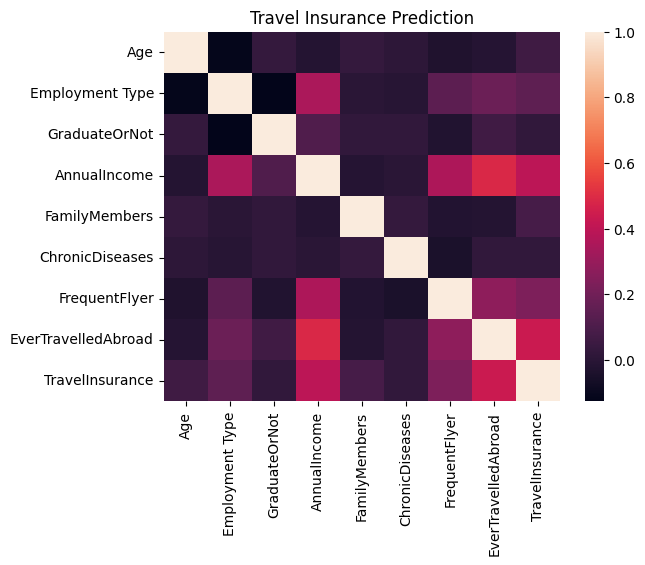

In [17]:
sns.heatmap(data.corr())
plt.title("Travel Insurance Prediction")
plt.show()

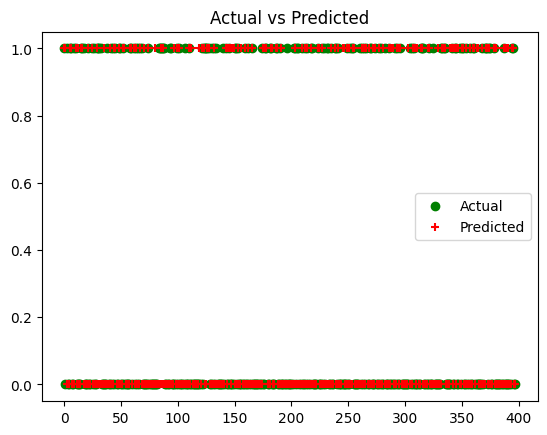

In [18]:
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual')
plt.scatter(range(len(y_predict)), y_predict, color='red', marker='+', label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## prediction

In [ ]:
y_predict= model.predict([[29, 100000, 0, 1]]) 
y_predict

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])